In [1]:
from facenet_pytorch import InceptionResnetV1
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch


In [2]:
model = InceptionResnetV1(pretrained='vggface2').eval()


In [3]:
# If you pick an image from the train folder, you can need use mtcnn to get the crop of just the face
# or you can use the already pre-processed image in train_aligned folder
img = Image.open('/home/vk352/FaceDetection/datasets/vgg_face2/train/n002744/0326_01.jpg')
img2 = Image.open('/home/vk352/FaceDetection/datasets/vgg_face2/train/n002744/0327_01.jpg')
img1 = Image.open('/home/vk352/FaceDetection/datasets/vgg_face2/train_aligned/n005567/0321_01.png')
mtcnn = MTCNN(image_size=182, margin=44)

In [4]:
model.classify = True
crop = mtcnn(img)
crop2 = mtcnn(img2)
img_embedding = model(torch.stack((crop, crop2)))

In [12]:
img_embedding[0]

tensor([ 0.9782,  0.1098, -4.1340,  ...,  1.3101, -0.8747, -0.4780],
       grad_fn=<SelectBackward>)

In [70]:
img_embedding.argmax(dim=1)


tensor([2563, 2563], grad_fn=<NotImplemented>)

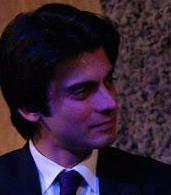

In [8]:
img